In [127]:
# Import library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Import Datasets
df_seq = pd.read_csv('data/pdb_data_seq.csv')
df_char = pd.read_csv('data/pdb_data_no_dups.csv')


In [128]:
# Look through df_seq DataFrame
print(df_seq.info())
print()
print(df_seq.isnull().sum())
print()
print(df_seq['macromoleculeType'].value_counts(dropna=False))

# Filter for protein sequences only
protein_seq = df_seq[df_seq['macromoleculeType'] == 'Protein']
print(protein_seq)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467304 entries, 0 to 467303
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   structureId        467304 non-null  object
 1   chainId            467294 non-null  object
 2   sequence           467276 non-null  object
 3   residueCount       467304 non-null  int64 
 4   macromoleculeType  432487 non-null  object
dtypes: int64(1), object(4)
memory usage: 17.8+ MB
None

structureId              0
chainId                 10
sequence                28
residueCount             0
macromoleculeType    34817
dtype: int64

macromoleculeType
Protein                       345180
Protein#RNA                    56226
NaN                            34817
Protein#DNA                    21303
DNA                             3784
Protein#DNA#RNA                 2712
RNA                             2389
Protein#RNA#DNA/RNA Hybrid       304
Protein#DNA#DNA/RNA Hybrid       1

In [129]:
# Examine df_char DataFrame
print(df_char.info())
print()
print(df_char.isnull().sum())
print()
print(df_char['macromoleculeType'].value_counts(dropna = False))

# Filter to macromolecule type = protein
protein_char = df_char[df_char['macromoleculeType'] == 'Protein']
print(protein_char)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141401 entries, 0 to 141400
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   structureId               141401 non-null  object 
 1   classification            141399 non-null  object 
 2   experimentalTechnique     141401 non-null  object 
 3   macromoleculeType         137636 non-null  object 
 4   residueCount              141401 non-null  int64  
 5   resolution                128589 non-null  float64
 6   structureMolecularWeight  141401 non-null  float64
 7   crystallizationMethod     96242 non-null   object 
 8   crystallizationTempK      97039 non-null   float64
 9   densityMatthews           124724 non-null  float64
 10  densityPercentSol         124749 non-null  float64
 11  pdbxDetails               118534 non-null  object 
 12  phValue                   105110 non-null  float64
 13  publicationYear           117602 non-null  f

In [130]:
# Inner join two DataFrames by structureID
joint_df = pd.merge(protein_seq, protein_char, on = 'structureId')

# Examine joined df for missing values
print(joint_df.info())

# Drop missing values
joint_df = joint_df.dropna().reset_index(drop = True)

print(joint_df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346325 entries, 0 to 346324
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   structureId               346325 non-null  object 
 1   chainId                   346323 non-null  object 
 2   sequence                  346322 non-null  object 
 3   residueCount_x            346325 non-null  int64  
 4   macromoleculeType_x       346325 non-null  object 
 5   classification            346324 non-null  object 
 6   experimentalTechnique     346325 non-null  object 
 7   macromoleculeType_y       346325 non-null  object 
 8   residueCount_y            346325 non-null  int64  
 9   resolution                330232 non-null  float64
 10  structureMolecularWeight  346325 non-null  float64
 11  crystallizationMethod     240597 non-null  object 
 12  crystallizationTempK      243934 non-null  float64
 13  densityMatthews           307481 non-null  f

In [131]:
# Overview of joined dataframe
print(joint_df)
print(joint_df.columns)


       structureId chainId                                           sequence  \
0             1914       A  MASMTGGQQMGRIPGNSPRMVLLESEQFLTELTRLFQKCRSSGSVF...   
1             1A04       A  SNQEPATILLIDDHPMLRTGVKQLISMAPDITVVGEASNGEQGIEL...   
2             1A04       B  SNQEPATILLIDDHPMLRTGVKQLISMAPDITVVGEASNGEQGIEL...   
3             1A0R       B  XSELDQLRQEAEQLKNQIRDARKACADATLSQITNNIDPVGRIQMR...   
4             1A0R       G  PVINIEDLTEKDKLKMEVDQLKKEVTLERMLVSKCCEEFRDYVEER...   
...            ...     ...                                                ...   
170149        6FAH       B  MRILVCAKQVPDTNEVKIDPKTGTMIREGVPSILNPDDANALEAAL...   
170150        6FAH       C  MYFSEQNKMIRKLARDFAEKELTTEILDEVEESGEFPQEILDKMAK...   
170151        6FAH       D  MYFSEQNKMIRKLARDFAEKELTTEILDEVEESGEFPQEILDKMAK...   
170152        6FAH       E  MAIKVIEEKCIGCSKCQKSCPFDAITIENKIAVIGDACTNCGTCID...   
170153        6FAH       F  MRILVCAKQVPDTNEVKIDPKTGTMIREGVPSILNPDDANALEAAL...   

        residueCount_x macr

In [132]:
# Check if the overlapping column contents are equal
print((joint_df['macromoleculeType_x'] == joint_df['macromoleculeType_y']).value_counts())
print((joint_df['residueCount_x'] == joint_df['residueCount_y']).value_counts())

True    170154
Name: count, dtype: int64
True    170154
Name: count, dtype: int64


In [133]:
# Both columns give True for all 170154 rows, therefore will be dropping one and renaming
joint_df['macromoleculeType'] = joint_df['macromoleculeType_x']  
joint_df.drop(columns=['macromoleculeType_x', 'macromoleculeType_y'], inplace=True)

joint_df['residueCount'] = joint_df['residueCount_x']  # or _y
joint_df.drop(columns=['residueCount_x', 'residueCount_y'], inplace=True)

In [134]:
# Checking shape of joint_df again
joint_df.shape

(170154, 16)

classification
HYDROLASE                         22963
TRANSFERASE                       18159
OXIDOREDUCTASE                    17007
IMMUNE SYSTEM                      9679
HYDROLASE/HYDROLASE INHIBITOR      8966
                                  ...  
Transferase, Signaling protein        1
HYDROLASE, ANTITUMOR PROTEIN          1
Ligase, Transferase                   1
ANTIVIRAL PROTEIN, HYDROLASE          1
lipid transport/activator             1
Name: count, Length: 2172, dtype: int64


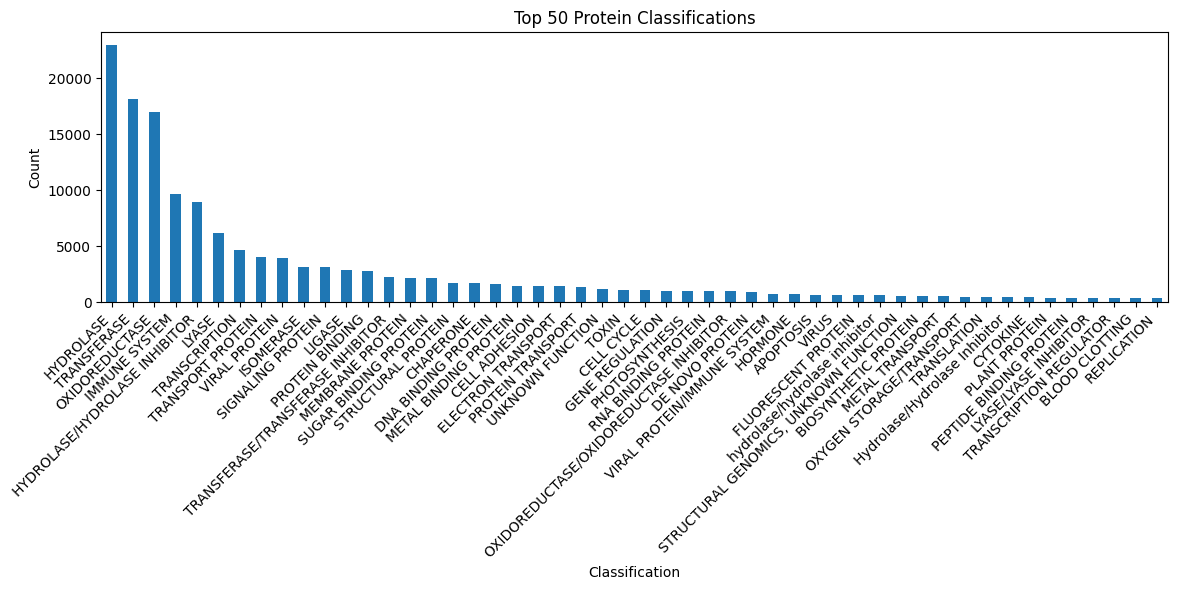

In [135]:
# Class of the protein is essential and distribution is to be checked
class_count = joint_df['classification'].value_counts(ascending= False)
print(class_count)

joint_df['classification'].value_counts().head(50).plot.bar(figsize=(12, 6))
plt.title("Top 50 Protein Classifications")
plt.xlabel("Classification")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [136]:
# Wide distribtuion of protein class, therefore will be filter class for counts over 1000
class_filter = class_count[class_count > 1000].index
print(class_filter)
len(class_filter)


Index(['HYDROLASE', 'TRANSFERASE', 'OXIDOREDUCTASE', 'IMMUNE SYSTEM',
       'HYDROLASE/HYDROLASE INHIBITOR', 'LYASE', 'TRANSCRIPTION',
       'TRANSPORT PROTEIN', 'VIRAL PROTEIN', 'ISOMERASE', 'SIGNALING PROTEIN',
       'LIGASE', 'PROTEIN BINDING', 'TRANSFERASE/TRANSFERASE INHIBITOR',
       'MEMBRANE PROTEIN', 'SUGAR BINDING PROTEIN', 'STRUCTURAL PROTEIN',
       'CHAPERONE', 'DNA BINDING PROTEIN', 'METAL BINDING PROTEIN',
       'CELL ADHESION', 'ELECTRON TRANSPORT', 'PROTEIN TRANSPORT',
       'UNKNOWN FUNCTION', 'TOXIN', 'CELL CYCLE', 'GENE REGULATION',
       'PHOTOSYNTHESIS', 'RNA BINDING PROTEIN'],
      dtype='object', name='classification')


29

In [137]:
print(joint_df.shape)

# Filter joined dataframe from the classes with count number over 1000
filtered_1000 = joint_df[joint_df['classification'].isin(class_filter)].reset_index(drop=True)
print(filtered_1000.shape)

# Drop duplicates specifically on the subset
filtered_1000_dropped = filtered_1000.drop_duplicates(subset=["sequence"]).reset_index(drop=True)
print(filtered_1000_dropped.shape)

(170154, 16)
(131401, 16)
(33771, 16)


In [138]:
# Examining dataframe and filtering for columns that will be used for machine learning
print(filtered_1000_dropped.info())
print(filtered_1000_dropped.head())

columns = ["classification", "structureId", "sequence", "resolution", "structureMolecularWeight",
           "crystallizationTempK", "densityMatthews", "densityPercentSol", "phValue", "residueCount"]
final_data = filtered_1000_dropped[columns]

# Examine final data
print(final_data.info())
print(final_data.head())

# Final data to csv
final_data.to_csv('final_data.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33771 entries, 0 to 33770
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   structureId               33771 non-null  object 
 1   chainId                   33771 non-null  object 
 2   sequence                  33771 non-null  object 
 3   classification            33771 non-null  object 
 4   experimentalTechnique     33771 non-null  object 
 5   resolution                33771 non-null  float64
 6   structureMolecularWeight  33771 non-null  float64
 7   crystallizationMethod     33771 non-null  object 
 8   crystallizationTempK      33771 non-null  float64
 9   densityMatthews           33771 non-null  float64
 10  densityPercentSol         33771 non-null  float64
 11  pdbxDetails               33771 non-null  object 
 12  phValue                   33771 non-null  float64
 13  publicationYear           33771 non-null  float64
 14  macrom